In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import re
pd.options.display.float_format = '{:.5f}'.format
data = "/Users/luci031/Desktop/Coding/g_auction"

# matplotlib 폰트설정
plt.rc('font', family='AppleGothic') # For MacOS
# plt.rc('font', family='NanumGothic') # For Windows
print(plt.rcParams['font.family'])

%matplotlib inline
# 브라우저에서 바로 이미지를 그린다.

plt.rcParams['axes.unicode_minus'] = False

['AppleGothic']


In [42]:
# 보기 옵션
pd.set_option('display.max_columns', 30)
pd.set_option('display.max_rows', 30)

In [2]:
df = pd.read_parquet("/Users/luci031/Desktop/Coding/g_auction/data_ingredients/auction_total.parquet")
df_org = pd.read_csv("/Users/luci031/Desktop/Coding/g_auction/data_origin/auction_202002.csv",encoding='euc_kr')

# 품목별 가격 분포

In [4]:
df['prd'].value_counts()

사과     729403
배추     694797
무      501140
양파     399625
배      295792
미나리    195936
쪽파     150364
마늘     125376
갓       74244
생강      56165
열무      49923
굴       45505
총각무     11405
Name: prd, dtype: int64

## 갓

In [21]:
df['year'] = df['reg_date'].dt.year
df['month'] = df['reg_date'].dt.month

In [22]:
df

,prd,scale,price,eco,reg_date,new_class,price_kg,state,city,year,month
280,총각무,2.00000,1700,normal,2017-11-01,1,850.00000,경기,평택,2017,11
282,총각무,2.00000,1500,normal,2017-11-01,1,750.00000,경기,평택,2017,11
284,총각무,2.00000,1800,normal,2017-11-01,1,900.00000,경기,평택,2017,11
286,총각무,2.00000,1200,normal,2017-11-01,1,600.00000,경기,평택,2017,11
288,총각무,2.00000,1100,normal,2017-11-01,1,550.00000,경기,화성,2017,11
...,...,...,...,...,...,...,...,...,...,...,...
28137016,양파,15.00000,11000,normal,2022-10-27,8,733.33000,전남,무안,2022,10
28137017,양파,15.00000,11000,normal,2022-10-27,8,733.33000,전남,무안,2022,10
28137020,양파,15.00000,17000,normal,2022-10-28,8,1133.33000,전남,무안,2022,10
28137021,양파,15.00000,17000,normal,2022-10-28,8,1133.33000,전남,무안,2022,10


In [43]:
a = df.groupby(['prd','year','month'])['scale'].sum().reset_index()
a = a.groupby(['prd','month']).mean()['scale'].reset_index()
b = df.groupby(['prd','year','month'])['price_kg'].mean().reset_index()
b = b.groupby(['prd','month']).mean()['price_kg'].reset_index()

c = a.merge(b)
c
# c = c.groupby(['prd','month']).mean()

,prd,month,scale,price_kg
0,갓,1,4044.50000,2153.36547
1,갓,2,2671.50000,1987.12038
2,갓,3,4640.88500,1135.05278
3,갓,4,4531.12750,1007.75438
4,갓,5,4560.12500,851.78812
...,...,...,...,...
151,총각무,8,716.25000,1157.89039
152,총각무,9,1078.00000,1333.72406
153,총각무,10,3373.00000,956.73569
154,총각무,11,4226.00000,947.83329


In [50]:
c

,prd,month,scale,price_kg
0,갓,1,4044.50000,2153.36547
1,갓,2,2671.50000,1987.12038
2,갓,3,4640.88500,1135.05278
3,갓,4,4531.12750,1007.75438
4,갓,5,4560.12500,851.78812
...,...,...,...,...
151,총각무,8,716.25000,1157.89039
152,총각무,9,1078.00000,1333.72406
153,총각무,10,3373.00000,956.73569
154,총각무,11,4226.00000,947.83329


In [47]:
prd_lst = list(c['prd'].unique())
prd_lst

['갓', '굴', '마늘', '무', '미나리', '배', '배추', '사과', '생강', '양파', '열무', '쪽파', '총각무']

/var/folders/nq/s4zx76p53d11lnr0t1dxpxh00000gn/T/ipykernel_4033/783026317.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
/var/folders/nq/s4zx76p53d11lnr0t1dxpxh00000gn/T/ipykernel_4033/783026317.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])


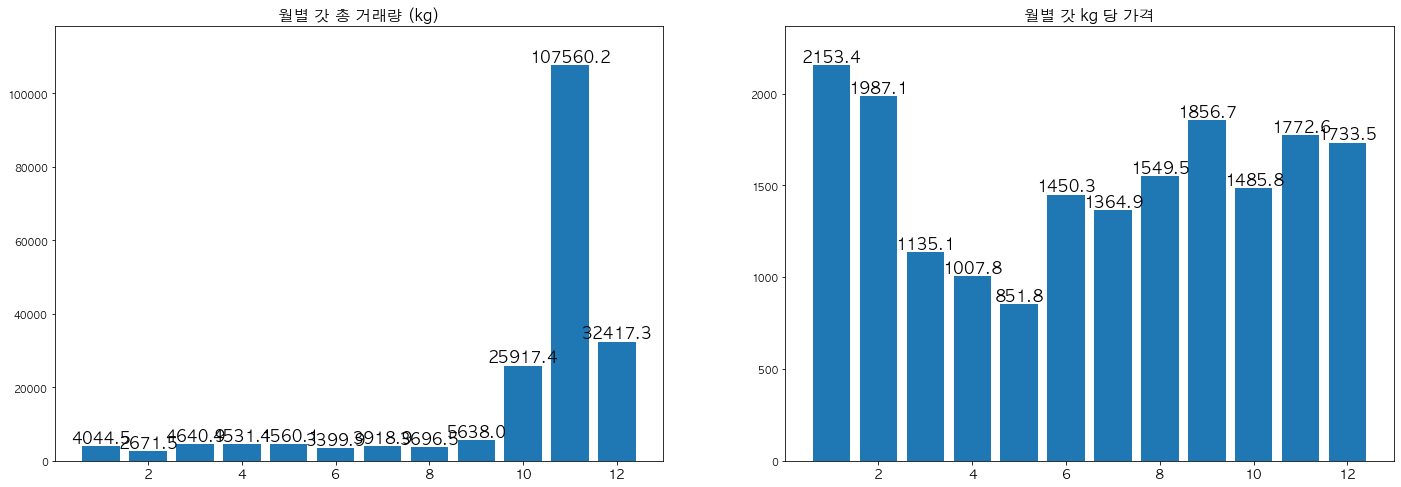

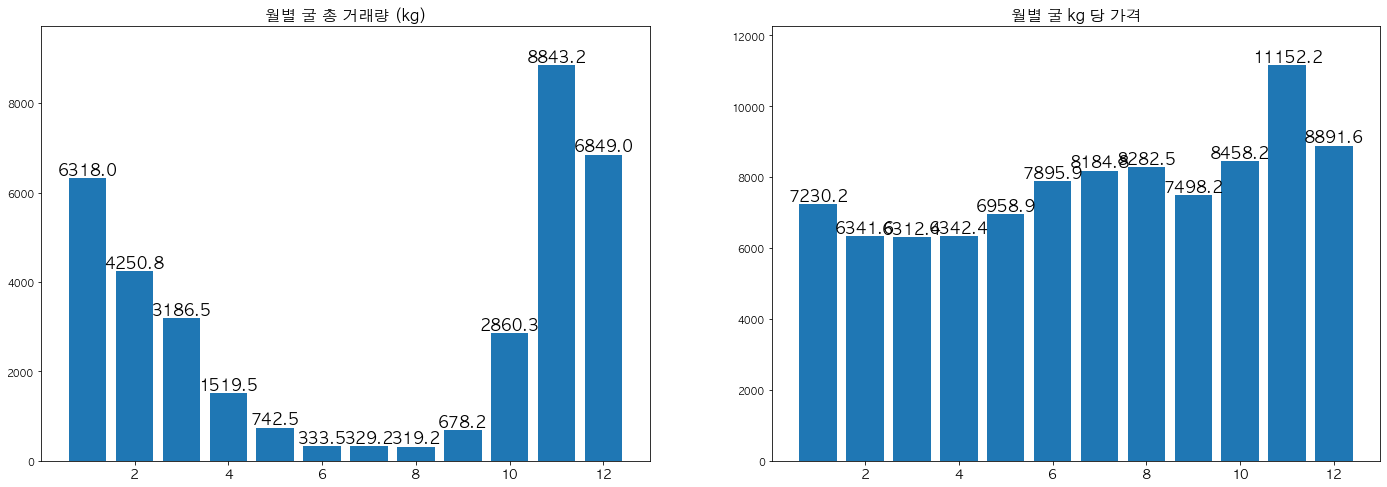

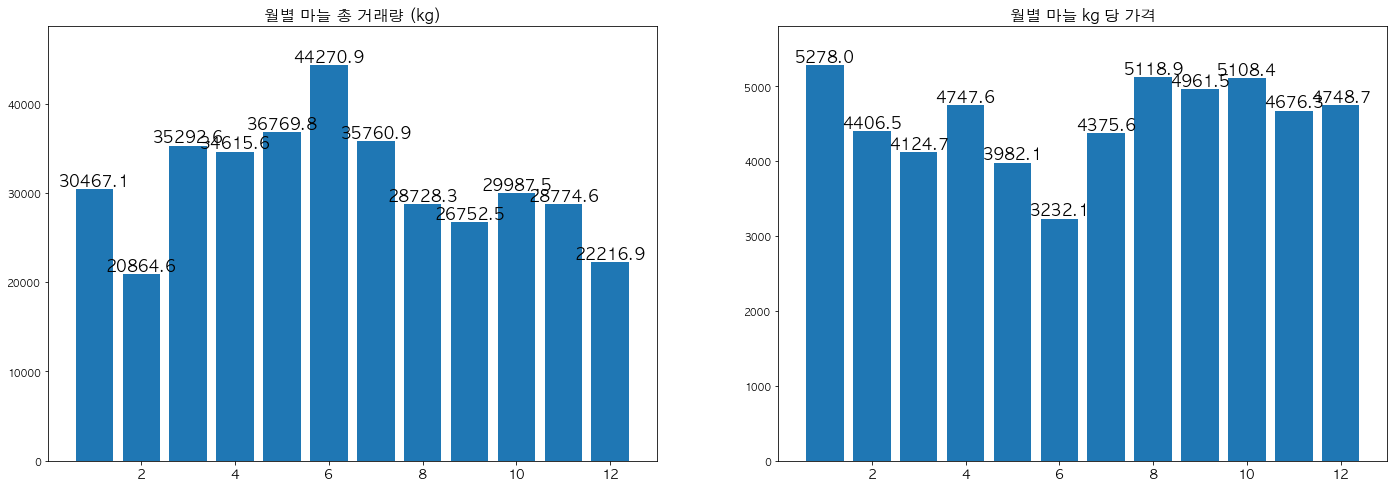

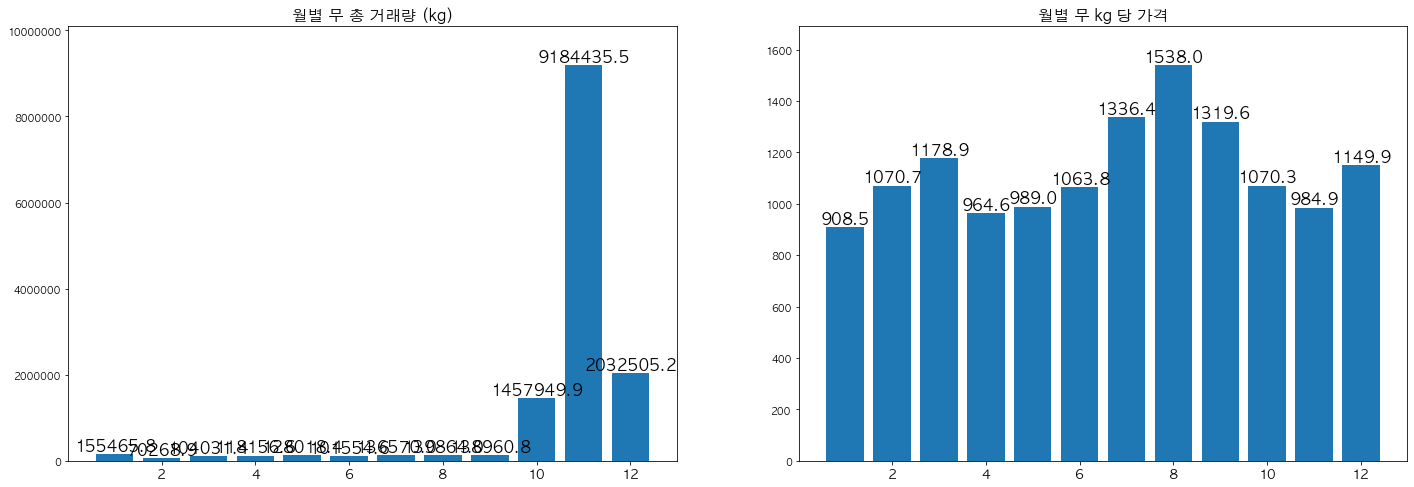

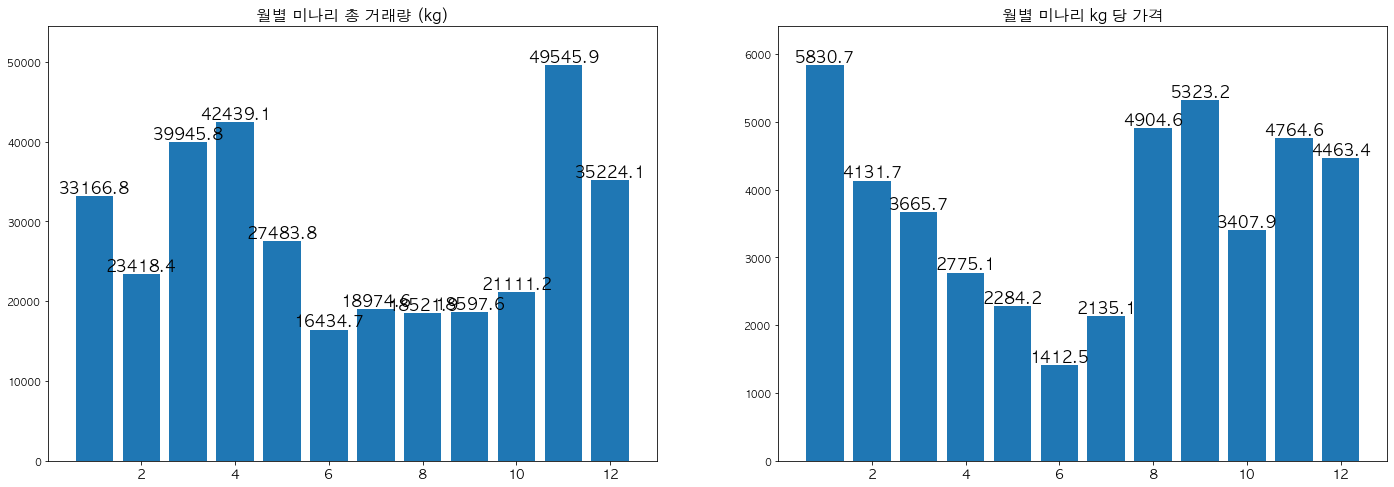

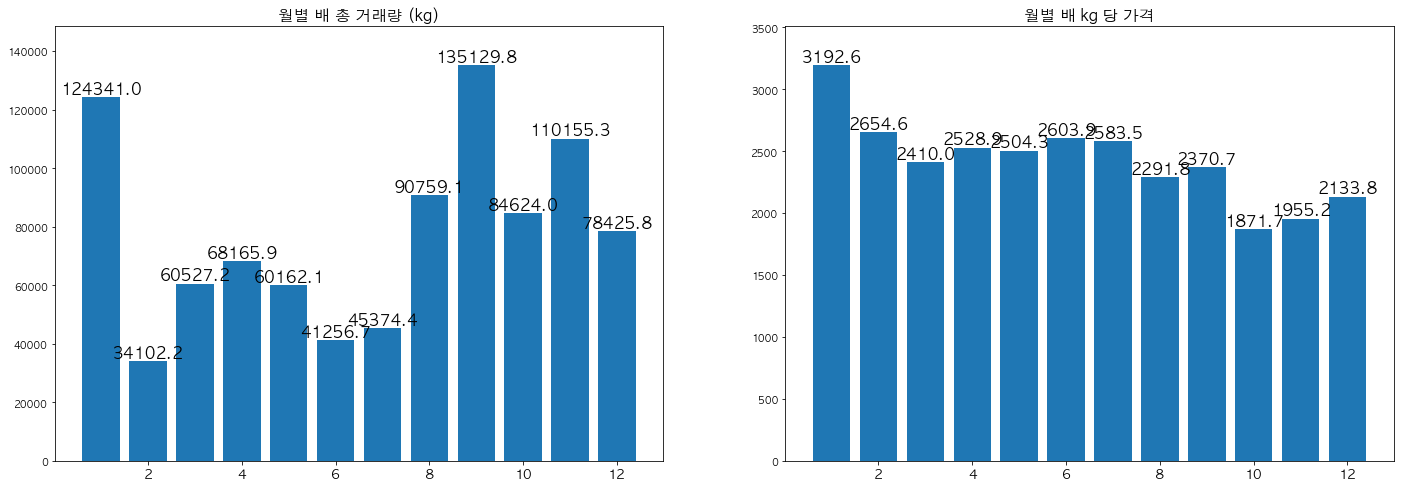

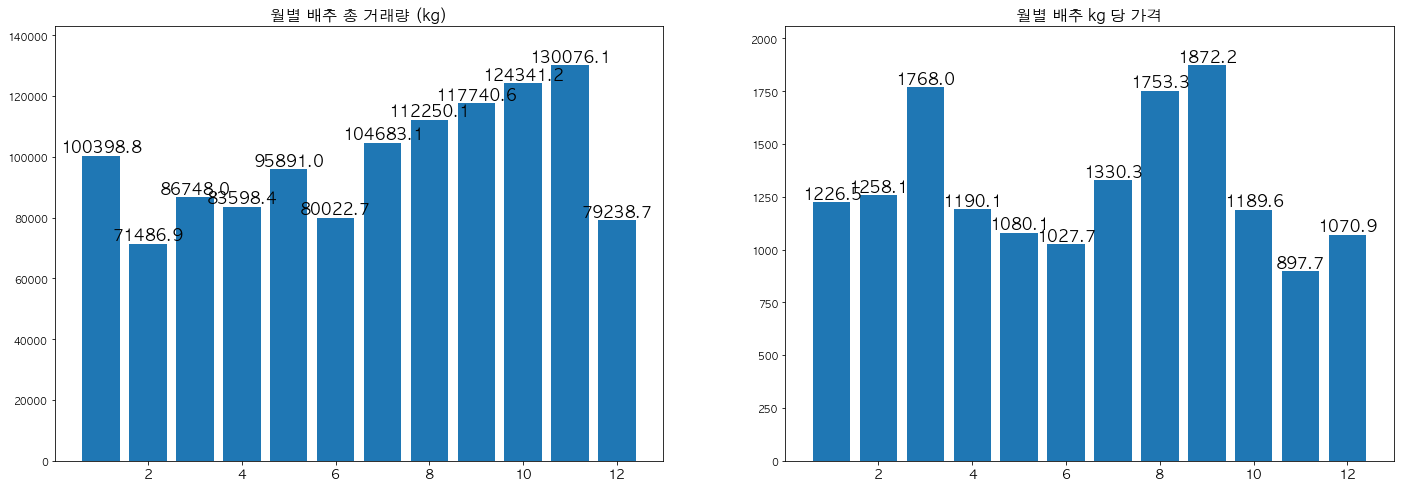

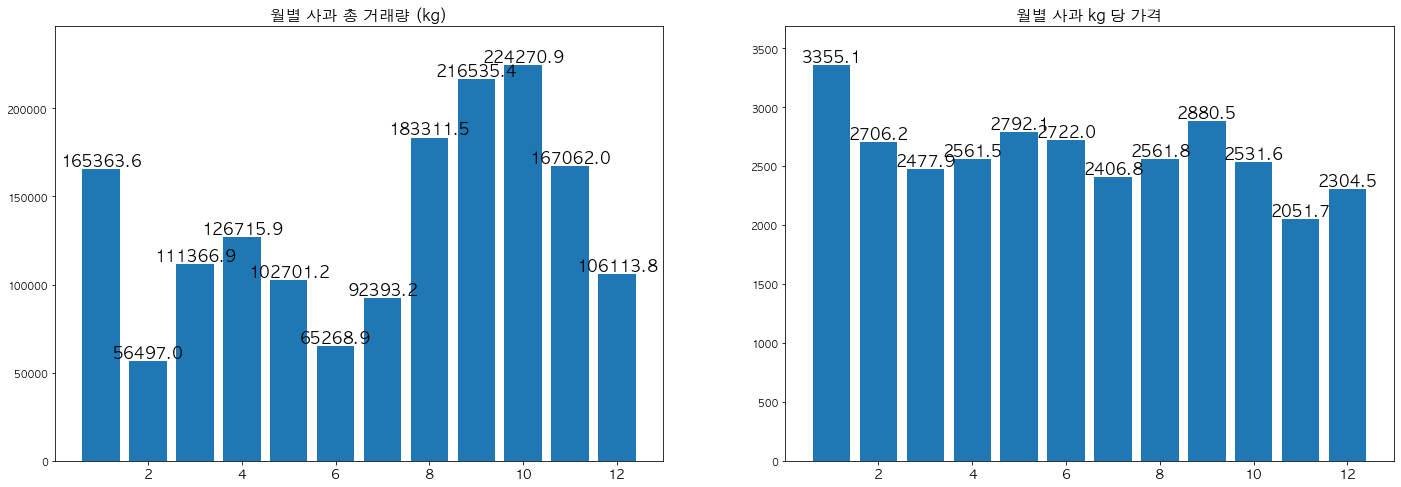

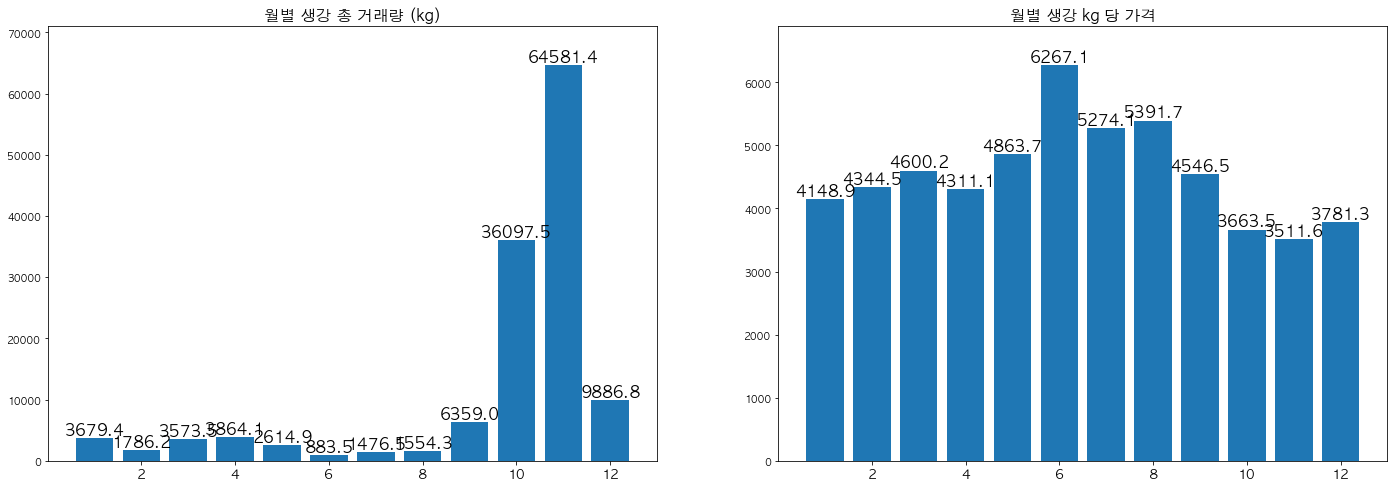

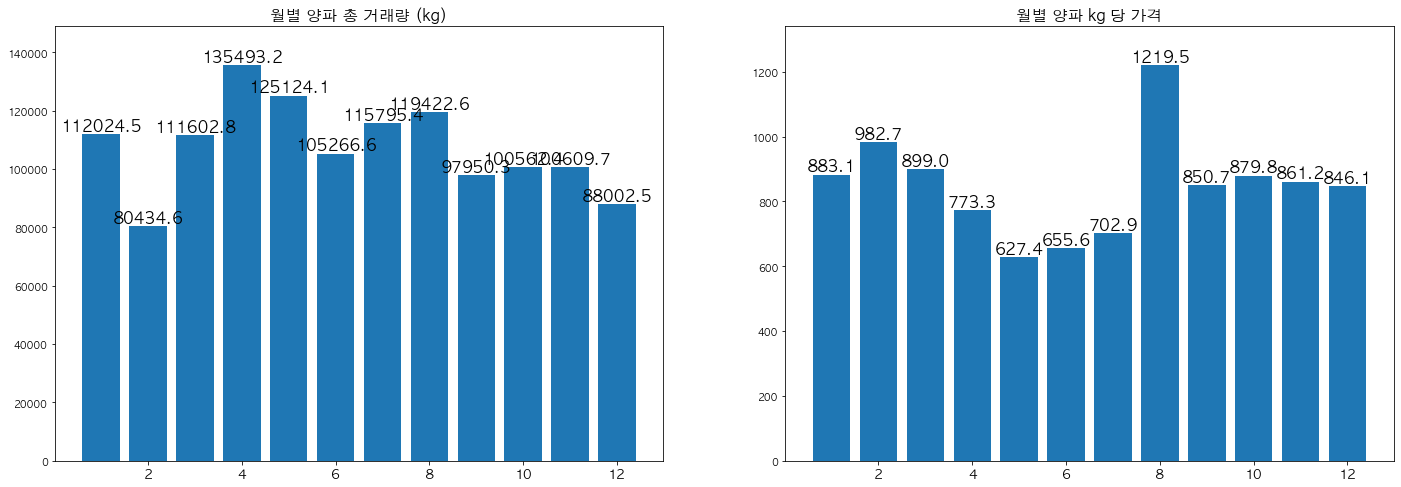

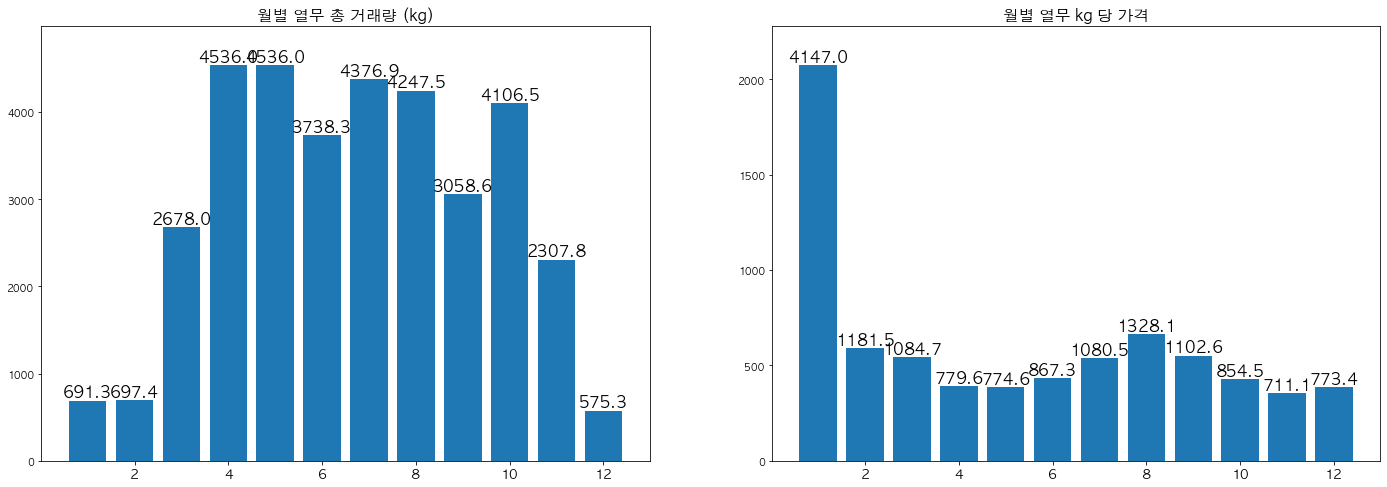

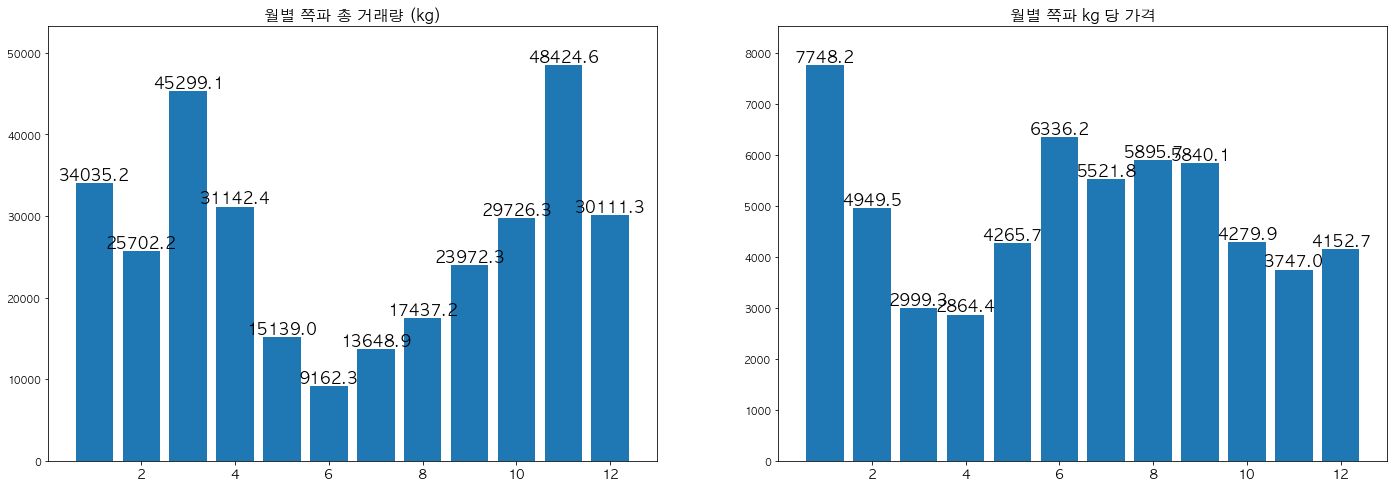

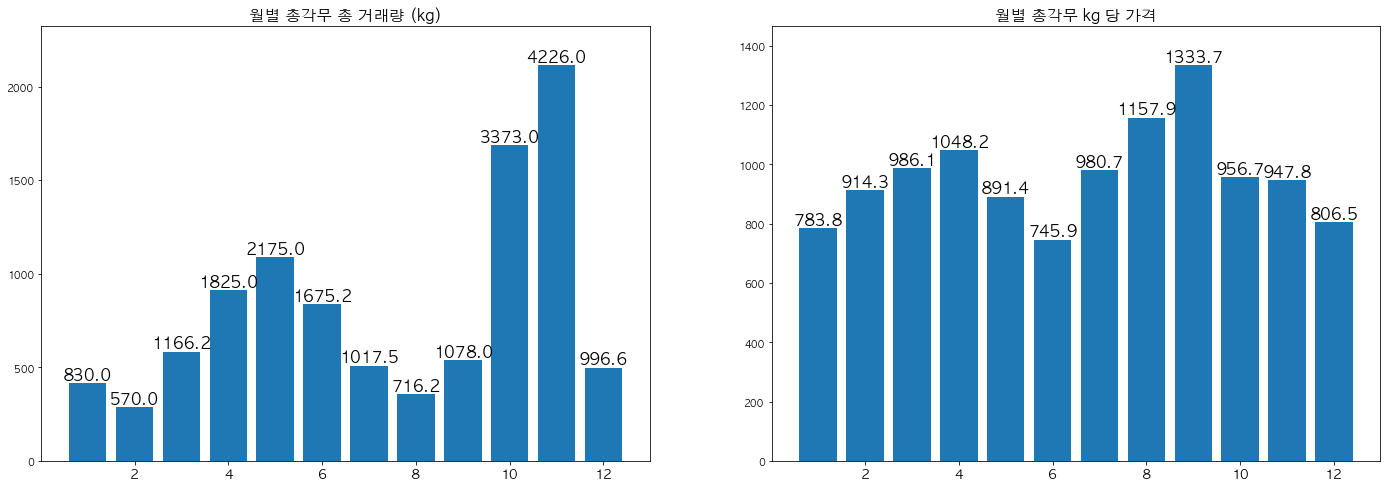

In [66]:
# avg pre

for prd in prd_lst:
    plt.figure(figsize=(24,8),facecolor="white")
    plt.subplot(1,2,1)
    plt.rc('font', size=13)
    plt.rc('ytick', labelsize=10) 
    plt.title('월별 '+prd+' 총 거래량 (kg)')
    aaa = plt.bar(c[c['prd']==prd]['month'],c[c['prd']==prd]['scale'])
    current_values = plt.gca().get_yticks()
    plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
    m_h = 0
    for rect in aaa:
        height = rect.get_height()
        m_h = max(m_h,height)
        plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 16)
    plt.ylim(0,m_h*1.1)

    plt.subplot(1,2,2)
    plt.rc('font', size=13)
    plt.rc('ytick', labelsize=10) 
    plt.title('월별 '+prd+' kg 당 가격')
    aaa = plt.bar(c[c['prd']==prd]['month'],c[c['prd']==prd]['price_kg'])
    current_values = plt.gca().get_yticks()
    plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
    m_h = 0
    for rect in aaa:
        height = rect.get_height()
        m_h = max(m_h,height)
        plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 16)
    plt.ylim(0,m_h*1.1)

# # avg cnt_b
# plt.figure(figsize=(7,7),facecolor="white")
# plt.rc('font', size=18)
# plt.rc('ytick', labelsize=12) 
# b = df0.groupby('frgn').mean()['pre'].reset_index()
# b.iloc[0,0] = 'no'
# b.iloc[1,0] = 'yes'
# plt.title('avg of purchases (case)')
# aaa = plt.bar(b['frgn'],b['pre'],color=['#d2dae2','#0be881'])
# current_values = plt.gca().get_yticks()
# m_h = 0
# for rect in aaa:
#     height = rect.get_height()
#     m_h = max(m_h,height)
#     plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 16)
# plt.ylim(0,m_h*1.1)
# plt.show()